In [64]:
# This file calculates gradient norm during the training of a DNN 

import tensorflow as tf
import numpy as np
import torch
import torchvision as tv
from torchvision import transforms, datasets
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
%matplotlib inline

In [65]:
# Create random data between (-10, 10) and determine groundtruth
# GroundTruth Function: y = cos(x)
simulatedInput = 20 * torch.rand((1000, 1)) - 10
groundTruth = np.cos(simulatedInput)

In [71]:
# Calculate the number of parameters in a neural network
def calcParams(inputModel):
    val = sum(params.numel() for params in inputModel.parameters() if params.requires_grad)
    return val

In [66]:
# Set up NN for MNIST training - 3 Hidden layer, 131 parameters
class GradientNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(1, 5)
        self.fc2 = nn.Linear(5, 10)
        self.fc3 = nn.Linear(10, 5)
        self.fc4 = nn.Linear(5, 1)

    def forward(self, val):
        val = F.relu(self.fc1(val))
        val = F.relu(self.fc2(val))
        val = F.relu(self.fc3(val))
        val = self.fc4(val)
        return val

In [73]:
# Set up necessary auxilaries for neural net training
gradNet = GradientNN()
costFunc = nn.MSELoss()
opt = optim.Adam(gradNet.parameters(), lr=0.001)
EPOCHS = 1000

In [68]:
# Train Network 
costList = []
gradNormList = []
counterList = []
counter = 1
for index in range(EPOCHS):
    counterList.append(counter)
    counter += 1
    gradNet.zero_grad()
    output = gradNet(simulatedInput)
    cost = costFunc(output, groundTruth)
    costList.append(cost)
    cost.backward()
    opt.step() 
    
    # Get gradient norm (From slides)
    gradAll = 0.0
    for p in gradNet.parameters():
        grad = 0.0
        if p.grad is not None:
            grad = (p.grad.cpu().data.numpy() ** 2).sum()
        gradAll += grad
    gradNorm = gradAll ** 0.5
    gradNormList.append(gradNorm)
    

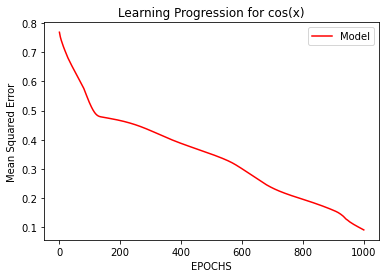

In [69]:
# Visulaize Training process of cos function
plt.plot(counterList, costList, 'r', label='Model')
plt.title("Learning Progression for cos(x)")
plt.xlabel("EPOCHS")
plt.ylabel("Mean Squared Error")
plt.legend(loc="upper right")
plt.show()

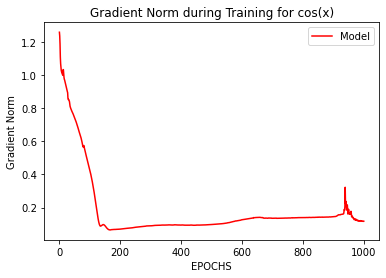

In [70]:
# Visulaize Gradient Norm of cos function during training
plt.plot(counterList, gradNormList, 'r', label='Model')
plt.title("Gradient Norm during Training for cos(x)")
plt.xlabel("EPOCHS")
plt.ylabel("Gradient Norm")
plt.legend(loc="upper right")
plt.show()